# Wykorzystanie rozkładów macierzy do rozwiązywania oznaczonych układów równań

Poznane na wykładzie rozkłady (faktoryzacje) macierzy możemy wykorzystać do rozwiązywania układów równań liniowych. Dzięki wykorzystaniu specjalnych własności macierzy występujących w rozkładzie jesteśmy w stanie w łatwiejszy sposób odwrócić macierz i tym samym zminimalizować błąd.


**Zadanie 1.**

Rozważmy układ równań $Ax=b$, w którym:
* $A$ jest macierzą Hilberta o wymiarach 15x15.
* $A$ jest macierzą wartości losowych z przedziału $[0,100]$ o wymiarach 100x100,  1000x1000 i 1000000x1000000.
* $b$ jest wektorem wartości losowych, odpowiednio, o wymiarach 15x1, 100x1, 1000x1 i 1000000x1.

1. Oblicz współczynnik uwarunkowania macierzy $A$ i oceń jej uwarunkowanie.
2. Rozwiąż układ równań następującymi metodami:
    * z użyciem jawnej odwrotności $A$.
    * korzystając z rozkładu [LU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) (uwaga na macierz permutacji!):
        * z wykorzystaniem odwrotności L i U.
        * z użyciem jedynie odwrotności i metody podstawiania wstecznego.
    * korzystając z rozkładu [QR](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html):
        * z wykorzystaniem odwrotności Q i R.
        * z użyciem jedynie odwrotności Q i metody podstawiania wstecznego.
    * za pomocą jednej z metod iteracyjnych z poprzedniego ćwiczenia.
    * za pomocą metody [`solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) z pakietu NumPy.
3. Porównaj otrzymane wyniki. W tym celu oblicz normy z residuuów otrzymanych dla każdego z rozwiązań. Którą z metod cechuje najwyższa dokladność?
4. Przeprowadź porównanie wydajności ww. metod. Zmierz czas wykonania każdej metody. Aby otrzymać bardziej sensowny wynik należy powtórzyć obliczenia w pętli (np. 100 lub 1000 razy) i uśrednić wynik. Do pomiaru czasu wykonania możesz wykorzystać pakiet `time`.
Wskazówka: Do rozwiązania układu z macierzą trójkątną możesz wykorzystać funkcję [`scipy.linalg.solve_triangular`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

        
        


In [3]:
import numpy as np
from scipy.linalg import lu, solve_triangular
import time

def inverse(A, b):
    return np.linalg.inv(A) @ b

def LU_1(A, b):
    P, L, U = lu(A)
    return solve_triangular(U, solve_triangular(L, np.dot(P, b), lower=True))

def measure_time(A, b, method, it=100):
    start = time.time()
    for i in range(it):
        method(A, b)
    stop = time.time()
    diff = stop - start
    avg = diff / it
    print(f'Średni czas działania metody {method.__name__}: {avg}')
    return avg

A_hilbert = np.linalg.inv(np.vander(np.arange(1, 16), increasing=True))
cond_hilbert = np.linalg.cond(A_hilbert)
print(f'Współczynnik uwarunkowania macierzy Hilberta: {cond_hilbert}')

b_15 = np.random.rand(15, 1)
b_100 = np.random.rand(100, 1)
b_1000 = np.random.rand(1000, 1)

A_100 = np.random.rand(100, 100)
A_1000 = np.random.rand(1000, 1000)

times_inverse_100 = measure_time(A_100, b_100, inverse)
times_LU_1_100 = measure_time(A_100, b_100, LU_1)

print("\nCzasy wykonania dla macierzy 100x100:")
print("Metoda odwracania: ", times_inverse_100)
print("Metoda LU: ", times_LU_1_100)

 

Współczynnik uwarunkowania macierzy Hilberta: 380713448532.1181
Średni czas działania metody inverse: 0.0024338793754577637
Średni czas działania metody LU_1: 0.004257526397705078

Czasy wykonania dla macierzy 100x100:
Metoda odwracania:  0.0024338793754577637
Metoda LU:  0.004257526397705078


# Interpolacja

**Zadanie 2.**

Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.

Pierwsza funkcja:

* $f(0) = 1$,
* $f(0.25) = 1.64872$,
* $f(0.5) = 2.71828$,
* $f(0.75) = 4.48169.$

Oblicz $f(0.43)$.

Druga funkcja:

* $f_2(0.1) = 0.62049958$,
* $f_2(0.2) = -0.28398668$,
* $f_2(0.3) = 0.00660095$,
* $f_2(0.4) = 0.24842440$. 

Oblicz $f_2(0.25)$.

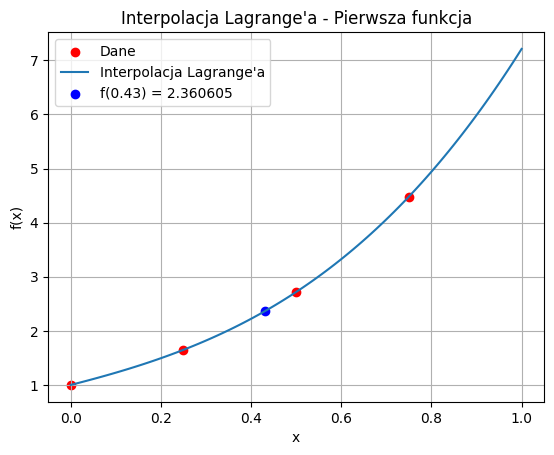

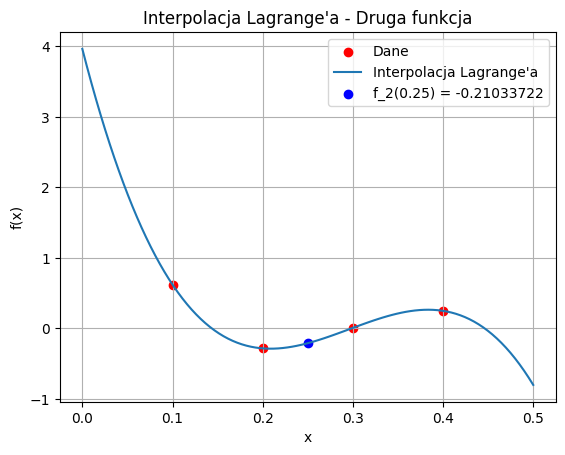

In [8]:
from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0, 0.25, 0.5, 0.75])
y1 = np.array([1, 1.64872, 2.71828, 4.48169])

poly1 = lagrange(x1, y1)

x_new1 = 0.43
f_043 = poly1(x_new1)

x_range1 = np.linspace(0, 1, 100)
y_range1 = poly1(x_range1)

plt.scatter(x1, y1, color='red', label='Dane')

plt.plot(x_range1, y_range1, label='Interpolacja Lagrange\'a')

plt.scatter(x_new1, f_043, color='blue', label=f'f(0.43) = {f_043:.6f}')

plt.legend()
plt.title('Interpolacja Lagrange\'a - Pierwsza funkcja')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.grid(True)
plt.show()

x2 = np.array([0.1, 0.2, 0.3, 0.4])
y2 = np.array([0.62049958, -0.28398668, 0.00660095, 0.24842440])

poly2 = lagrange(x2, y2)

x_new2 = 0.25
f2_025 = poly2(x_new2)

x_range2 = np.linspace(0, 0.5, 100)
y_range2 = poly2(x_range2)

plt.scatter(x2, y2, color='red', label='Dane')

plt.plot(x_range2, y_range2, label='Interpolacja Lagrange\'a')

plt.scatter(x_new2, f2_025, color='blue', label=f'f_2(0.25) = {f2_025:.8f}')

plt.legend()
plt.title('Interpolacja Lagrange\'a - Druga funkcja')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.grid(True)
plt.show()


***Zadanie 3.***

Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

**Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

Współczynnik uwarunkowania macierzy Hilberta 15x15: 3.67568286586649e+17
Przybliżony współczynnik uwarunkowania dla macierzy 100 x 100 : 32568.331568143312
Przybliżony współczynnik uwarunkowania dla macierzy 1000 x 1000 : 24.51975343610364
Przybliżony współczynnik uwarunkowania dla macierzy 10000 x 10000 : 19.22462663102786


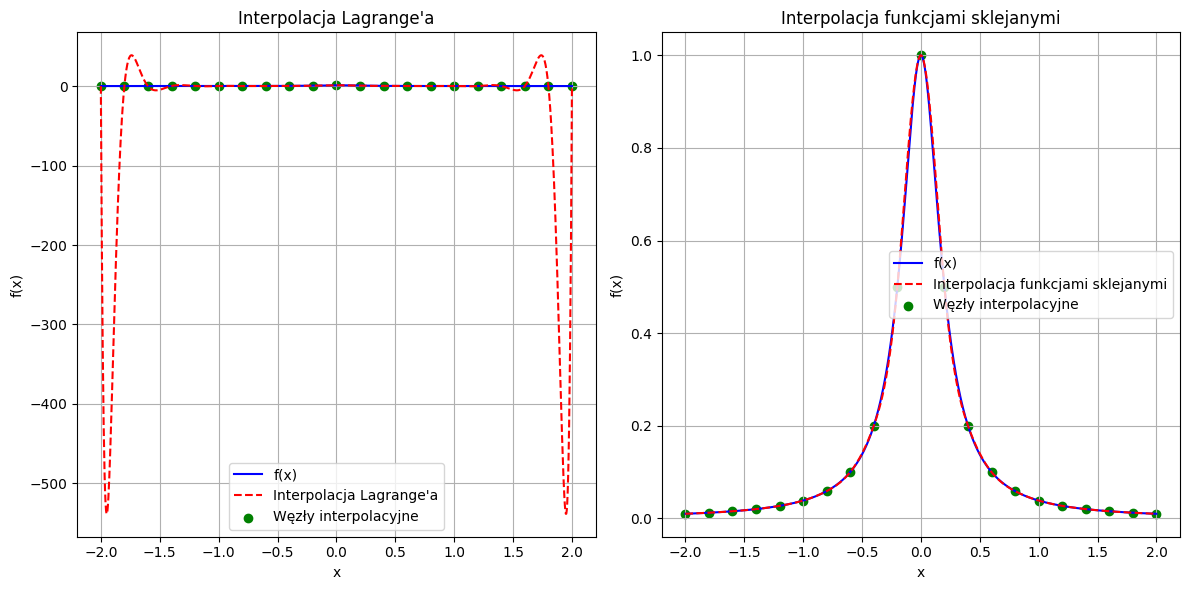

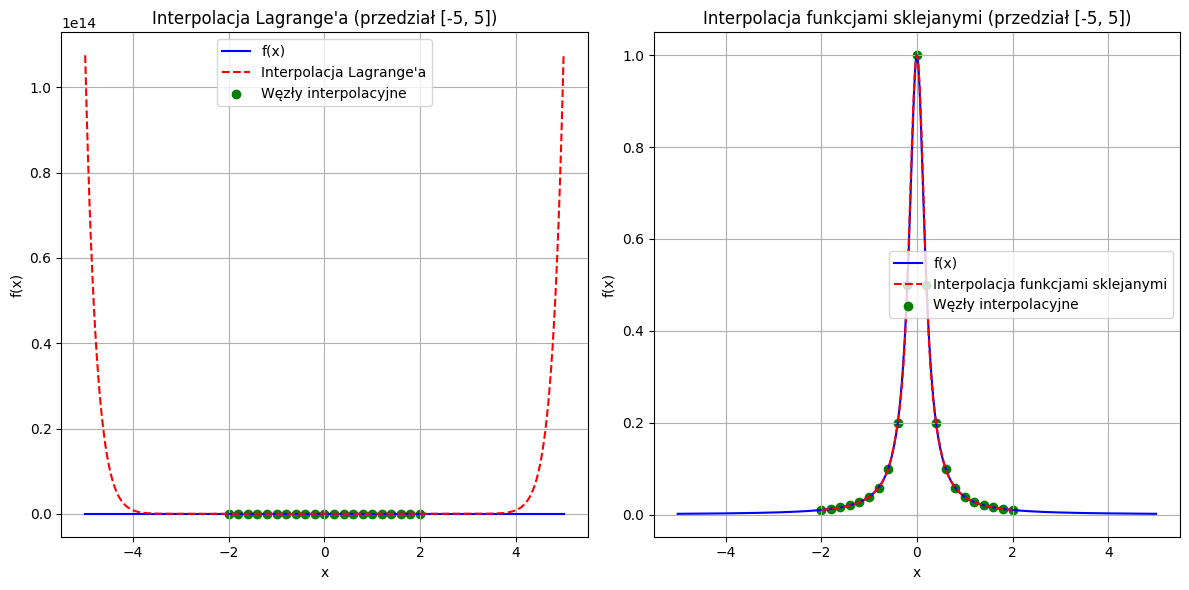

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d
from scipy.linalg import hilbert
from numpy.linalg import cond

# Zadanie 1:

A_hilbert_15 = hilbert(15)
cond_hilbert_15 = cond(A_hilbert_15)
print("Współczynnik uwarunkowania macierzy Hilberta 15x15:", cond_hilbert_15)

dimensions = [100, 1000, 10000]
subset_size = 100  
for dim in dimensions:
    A_random_subset = np.random.rand(subset_size, dim) * 100  
    cond_random_subset = cond(A_random_subset)
    print("Przybliżony współczynnik uwarunkowania dla macierzy", dim, "x", dim, ":", cond_random_subset)

# Zadanie 2: 


def f(x):
    return 1 / (25 * x**2 + 1)

x_range = np.linspace(-2, 2, 1000)

x_nodes = np.linspace(-2, 2, 21)
x_cheb_nodes = np.cos((2*np.arange(1, 22) - 1) * np.pi / (2*21))  

poly_lagrange = lagrange(x_nodes, f(x_nodes))
y_lagrange = poly_lagrange(x_range)

interp_spline = interp1d(x_nodes, f(x_nodes), kind='cubic')
y_spline = interp_spline(x_range)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_range, f(x_range), label='f(x)', color='blue')
plt.plot(x_range, y_lagrange, label='Interpolacja Lagrange\'a', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja Lagrange\'a')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_range, f(x_range), label='f(x)', color='blue')
plt.plot(x_range, y_spline, label='Interpolacja funkcjami sklejanymi', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja funkcjami sklejanymi')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Zadanie 3:

x_range_extended = np.linspace(-5, 5, 1000)

poly_lagrange_extended = lagrange(x_nodes, f(x_nodes))
y_lagrange_extended = poly_lagrange_extended(x_range_extended)

interp_spline_extended = interp1d(x_nodes, f(x_nodes), kind='cubic', bounds_error=False)
y_spline_extended = interp_spline_extended(x_range_extended)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_range_extended, f(x_range_extended), label='f(x)', color='blue')
plt.plot(x_range_extended, y_lagrange_extended, label='Interpolacja Lagrange\'a', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja Lagrange\'a (przedział [-5, 5])')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_range_extended, f(x_range_extended), label='f(x)', color='blue')
plt.plot(x_range_extended, y_spline_extended, label='Interpolacja funkcjami sklejanymi', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja funkcjami sklejanymi (przedział [-5, 5])')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

***Zadanie 4. Tylko do chętnych***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

Czas, gdy kierowca minął fotoradar: 2.26724699816926 s
Prędkość kierowcy w chwili minęcia fotoradaru: 21.823210121455173 m/s


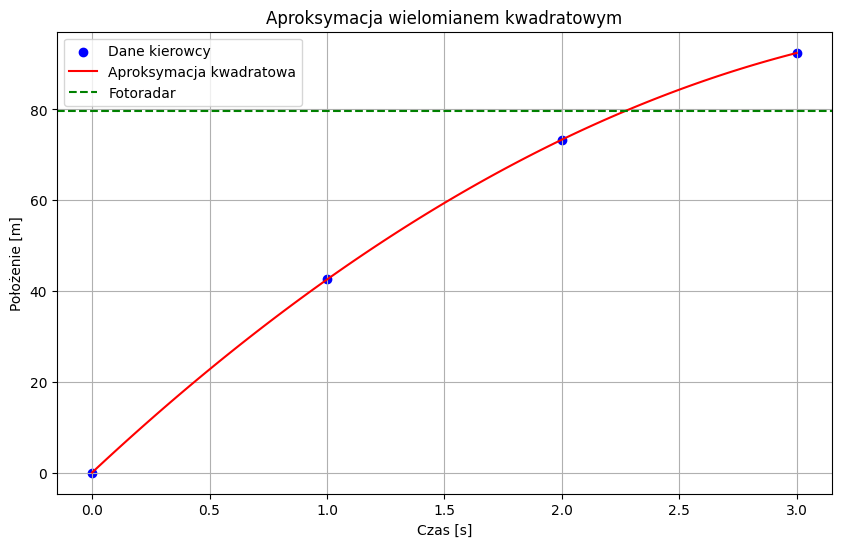

In [12]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

czas = np.array([0.0, 1.0, 2.0, 3.0])
polozenie = np.array([0.0, 42.7, 73.2, 92.5])
fotoradar = 79.6

def model(x, a, b, c):
    return a*x**2 + b*x + c

params, _ = curve_fit(model, czas, polozenie)

czas_fotoradar = (-params[1] + np.sqrt(params[1]**2 - 4*params[0]*(params[2] - fotoradar))) / (2*params[0])

predkosc = 2*params[0]*czas_fotoradar + params[1]

print(f"Czas, gdy kierowca minął fotoradar: {czas_fotoradar} s")
print(f"Prędkość kierowcy w chwili minęcia fotoradaru: {predkosc} m/s")

czas_lin = np.linspace(0, 3, 100)
polozenie_aproksymacja = model(czas_lin, *params)

plt.figure(figsize=(10, 6))
plt.scatter(czas, polozenie, label='Dane kierowcy', color='blue')
plt.plot(czas_lin, polozenie_aproksymacja, label='Aproksymacja kwadratowa', color='red')
plt.axhline(fotoradar, color='green', linestyle='--', label='Fotoradar')
plt.xlabel('Czas [s]')
plt.ylabel('Położenie [m]')
plt.title('Aproksymacja wielomianem kwadratowym')
plt.legend()
plt.grid(True)
plt.show()

**Zadanie dla zainteresowanych programowaniem funkcyjnym w Pythonie**

Stwórz funkcję znajdującą wielomian interpolacyjny metodą Lagrange'a. Funkcja powinna przyjmować dwie listy:
* listę argumentów ($x$-ów)
* listę wartości ($y$-ów).  


Po wykonaniu obliczeń funkcja powinna zwracać wielomian w postaci obiektu typu **funkcja** (a nie `numpy.Polynomial`).

**Wskazówka** Wykorzystaj wyrażenia *lambda*. Dla ułatwienia możesz się też posłużyć pakietami `operator` i `functools`.
